# DH199 Report Three Preparation

## 1. Data Exploration

### 1.1 Data Cleaning

The data cleaning process: https://github.com/lizhouf/dh199_spring19/blob/data_cleaning/DH199_Treaty_Council_Corpus_Data_Cleaning.ipynb

The data to be used is now stored as "treaties_datetime_sentiments_cleaned.csv" in https://github.com/lizhouf/dh199_spring19/blob/data_cleaning/treaties_datetime_sentiments_cleaned.csv

### 1.2 Import packages and cleaned data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("treaties_datetime_sentiments_cleaned.csv")
df.head()

,Unnamed: 0,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,...,neu,compound,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day
0,0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,...,0.809,0.9989,False,True,1768,10,24,1768,11,5
1,1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Abraham,Chief,Native,...,0.820,0.9706,False,True,1768,10,24,1768,11,5
2,2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,...,0.894,0.2960,False,True,1768,10,24,1768,11,5
3,3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speaker,NaN,Native,...,0.882,-0.3327,True,False,1768,10,24,1768,11,5
4,4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speaker,NaN,Native,...,0.817,0.8460,False,True,1768,10,24,1768,11,5


### 1.2 Select Nations of Interest

In [2]:
### Count number of records by nation
# make a list of all the (unique) native nations
nations = list(df[df["Native | Non-Native"]=="Native"]["Tribe or Ethnicity"].unique())
nations

['Oneida',
 'Mohawk',
 nan,
 'Aghquessaine',
 'Chauvrons',
 'Wea',
 'Miamis',
 'Potawatomi',
 'Ottawas',
 'Chippewa',
 'Seneca',
 'Scioto',
 'Delawares',
 'the Hurons, Delawares, Shawnee, Ottowas, Chippawas, Poutawattamies, Twightwees, Cherokees, and the Wabash Confederates ',
 'Shawanese',
 'Mingo',
 'Wyandott',
 'Kickapoo',
 'Mohegan',
 'Sawkies',
 'Piankeshaw',
 'Chickasaws']

In [3]:
# Get rid of nan and the group of nations
nations.pop(2)
nations.pop(12)
nations

['Oneida',
 'Mohawk',
 'Aghquessaine',
 'Chauvrons',
 'Wea',
 'Miamis',
 'Potawatomi',
 'Ottawas',
 'Chippewa',
 'Seneca',
 'Scioto',
 'Delawares',
 'Shawanese',
 'Mingo',
 'Wyandott',
 'Kickapoo',
 'Mohegan',
 'Sawkies',
 'Piankeshaw',
 'Chickasaws']

In [4]:
# count the number of records for each item in the nation's list
for i in nations:
    print("The number of record for", i, "is", len(df[df["Tribe or Ethnicity"]==i]))

The number of record for Oneida is 5
The number of record for Mohawk is 3
The number of record for Aghquessaine is 1
The number of record for Chauvrons is 1
The number of record for Wea is 6
The number of record for Miamis is 6
The number of record for Potawatomi is 6
The number of record for Ottawas is 3
The number of record for Chippewa is 2
The number of record for Seneca is 5
The number of record for Scioto is 1
The number of record for Delawares is 8
The number of record for Shawanese is 5
The number of record for Mingo is 1
The number of record for Wyandott is 1
The number of record for Kickapoo is 2
The number of record for Mohegan is 1
The number of record for Sawkies is 2
The number of record for Piankeshaw is 1
The number of record for Chickasaws is 1


In [5]:
# Visualize the count
nations_count = pd.DataFrame()
nations_count["nation"] = nations
counts = []
for i in nations:
    counts.append(len(df[df["Tribe or Ethnicity"]==i]))
nations_count["count"] = counts
nations_count.sort_values(by = ["count"],ascending = False, inplace=True)
nations_count

,nation,count
11,Delawares,8
4,Wea,6
5,Miamis,6
6,Potawatomi,6
0,Oneida,5
9,Seneca,5
12,Shawanese,5
7,Ottawas,3
1,Mohawk,3
15,Kickapoo,2


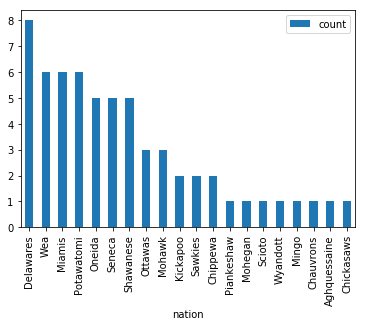

In [7]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
nations_count.plot(kind="bar", x="nation")

In [8]:
# we are interested in the data for nations with >4 records
nations_selected = []
for i in nations:
    if len(df[df["Tribe or Ethnicity"]==i])>4:
        nations_selected.append(i)

# select the data for the nations of interest
# reference: df operations: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection
df_natives = df[df["Tribe or Ethnicity"].isin(nations_selected)].iloc[:,1:].reset_index(drop=True)
df_natives

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,neu,compound,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.809,0.9989,False,True,1768,10,24,1768,11,5
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.894,0.2960,False,True,1768,10,24,1768,11,5
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,0.806,0.9820,False,True,1768,10,24,1768,11,5
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,0.881,0.9343,False,True,1768,10,24,1768,11,5
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0.901,0.9779,False,True,1768,10,24,1768,11,5
5,1781-02-25.txt,Treaty of 1781-02-25,1781-02-25,1781-02-25,Miamis,NaN,NaN,NaN,Native,Wea,...,0.803,0.9816,False,True,1781,2,25,1781,2,25
6,1781-03-09.txt,Treaty of 1781-03-09,1781-03-09,1781-03-09,NaN,NaN,NaN,Miamis Chief,Native,Miamis,...,0.740,0.9939,False,True,1781,3,9,1781,3,9
7,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Assimut,Chief of the Potawatomi,Native,Potawatomi,...,0.825,-0.9418,True,False,1781,3,11,1781,3,11
8,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Wawiaghtenou,Chief of the Potawatomi,Native,Potawatomi,...,0.679,-0.3369,True,False,1781,3,11,1781,3,11
9,1781-10-29.txt,Treaty of 1781-10-29,1781-10-29,1781-10-29,Detroit,Michigan,Miami Chief,Chief of the Potawatomi,Native,Miamis,...,0.868,-0.8972,True,False,1781,10,29,1781,10,29


In [10]:
df_natives.columns

Index(['Document', 'Treaty Name', 'Council Start Date', 'Council End Date',
       'Council City', 'Council State', 'Speaker', 'Position',
       'Native | Non-Native', 'Tribe or Ethnicity', 'Text', 'neg', 'pos',
       'neu', 'compound', 'Negative', 'Positive', 'start_year', 'start_month',
       'start_day', 'end_year', 'end_month', 'end_day'],
      dtype='object')

## 2. Data Pre-processing

### 2.1 Tokenize Words and Sentences

In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize
df_natives["word_tokens"] = df_natives.Text.apply(lambda x: word_tokenize(x))
df_natives["sent_tokens"] = df_natives.Text.apply(lambda x: sent_tokenize(x))
df_natives.head()

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,Negative,Positive,start_year,start_month,start_day,end_year,end_month,end_day,word_tokens,sent_tokens
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, a, Congress, with, the, several, Nations,...",[At a Congress with the several Nations on Tue...
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[Then, Canaghquieson, addressed, the, whole, a...",[Then Canaghquieson addressed the whole and de...
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, night, Tagawaron, returned, with, the, Ma...",[At night Tagawaron returned with the Map to S...
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, 10, A, M., The, Oneidas, returned, to, Si...",[At 10 A M. The Oneidas returned to Sir Willia...
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,False,True,1768,10,24,1768,11,5,"[At, night, Canaquieson, came, to, inform, Sir...",[At night Canaquieson came to inform Sir Willi...


### 2.2 Remove Stopwords

In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# we only remove the stopwords for the tokenized words
# to keep the syntaxes of the texts original

def filter_stopwords(words, stopWords):
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    return wordsFiltered

df_natives.word_tokens = df_natives.word_tokens.apply(lambda x: filter_stopwords(x, stop_words))

### 2.3 Stemmatizing

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [27]:
# try a single sample
for w in df_natives.word_tokens[0]: 
    print(w, " : ", ps.stem(w)) 

At  :  At
Congress  :  congress
several  :  sever
Nations  :  nation
Tuesday  :  tuesday
25th  :  25th
Octr  :  octr
.  :  .
PRESENT  :  present
—  :  —
.  :  .
Canaghquieson  :  canaghquieson
,  :  ,
Chief  :  chief
Oneida  :  oneida
,  :  ,
stood  :  stood
&  :  &
addressing  :  address
present  :  present
,  :  ,
observed  :  observ
several  :  sever
American  :  american
Governors  :  governor
Indian  :  indian
Names  :  name
,  :  ,
known  :  known
Indians  :  indian
,  :  ,
Governor  :  governor
New  :  new
Jersey  :  jersey
excepted  :  except
;  :  ;
therefore  :  therefor
thought  :  thought
necessary  :  necessari
compliment  :  compliment
name  :  name
,  :  ,
bestowing  :  bestow
name  :  name
upon  :  upon
,  :  ,
Excellency  :  excel
Governor  :  governor
[  :  [
William  :  william
]  :  ]
Franklin  :  franklin
shook  :  shook
hand  :  hand
&  :  &
returned  :  return
thanks  :  thank
.  :  .
Then  :  then
Canaghquieson  :  canaghquieson
proceeded  :  proceed
answer  :  

In [28]:
# apply to all the word_tokens

def stem_words(words):
    wordsStemmed = []
    for w in words:
        wordsStemmed.append(ps.stem(w))
    return wordsStemmed

df_natives.word_tokens = df_natives.word_tokens.apply(lambda x: stem_words(x))

### 2.4 Identify Symbols

We can identify the general symbols for each of the text above, from the list https://www.warpaths2peacepipes.com/native-american-symbols/list-of-symbols.htm; we stored the possible symbols in a csv file.

In [12]:
# make a list of all the words that might be used by the nations
df_symbols = pd.read_csv("symbols.csv")
df_symbols.head()

,Names of Symbols,Meanings of Symbols
0,Arrow,Meaning of Arrow symbol
1,Arrowhead,Meaning of Arrowhead symbol
2,Avanyu,Meaning of Avanyu symbol
3,Bear,Meaning of Bear symbol
4,Bear Track,Meaning of Bear Track symbol


In [14]:
print("There are", df_symbols.shape[0], "possible symbols.")

There are 109 possible symbols.


In [19]:
symbols = list(df_symbols["Names of Symbols"])
len(symbols)

109

In [29]:
# stem the symbols and make them unique
symbol_stems = list(set(stem_words(symbols)))
symbol_stems

['piasa dragon',
 'shaman',
 'spider',
 'bird track',
 'crow',
 'sun symbol',
 'butterfli',
 'deer track',
 'handprint',
 'red horn',
 'spring & summ',
 'feathered serp',
 'bird symbol',
 'protect',
 'hors',
 'rain',
 'arrow',
 'great spirit',
 'symbol of strength',
 'bear track',
 'squar',
 'life',
 'snake',
 'warrior',
 'zuni bear',
 'serpent',
 'wolf',
 'peac',
 'death',
 'hand ey',
 'thunderbird',
 'falcon',
 'feather',
 'man in the maz',
 'raccoon',
 'drum',
 'dancer',
 'war',
 'horned serp',
 'homecom',
 'turtl',
 'twin',
 'mountain rang',
 'arrowhead',
 'journey',
 'raven',
 'star',
 'avanyu',
 'trickster - coyot',
 'kokopelli',
 'brother',
 'man',
 'eye of a medicine man',
 'heartlin',
 'winter',
 'temporary hom',
 'courag',
 'yei',
 'hope',
 'water',
 'strength',
 'hoof print',
 'lake',
 'sister',
 'scalp',
 'morning star',
 'fertil',
 'bird man',
 'camp fir',
 'mother',
 'gila monst',
 'hawk',
 'circl',
 'famili',
 'coyot',
 'great serp',
 'harmoni',
 'moon',
 'owl',
 'chunke

## 3. Text Analysis around Specific Research Questions

### 3.1 What symbols are being used? Which of them are used most frequently?

In [51]:
# add all the symbols as columns in the df
for w in symbol_stems:
    df_natives[w] = [0]*len(df_natives)
print("Shape of df_natives after adding is", list(df_natives.shape))

Shape of df_natives after adding is [41, 134]


In [52]:
df_natives.head()

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,indian camp,earth,medicine wheel,saddlebag,cactu,white soldi,hummingbird,bear,four ages of man,panther
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_natives["fire"]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
Name: fire, dtype: int64

In [94]:
for i in range(25,133):
    print(i)

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


In [104]:
# add count to each cell
for index, row in df_natives.iterrows(): 
    # starts from row[25] to row[133] are the symbol_stems
    for i in range(25,134):
        df_natives[row[i]]=row["word_tokens"].count(symbol_stems[i-25])

# for i in range(len(df_natives)):
#     for s in symbol_stems:
#         df_natives[i].count(s)

In [134]:
# example:
d = {'option1': ['1', '0', '1', '1'], 'option2': ['0', '0', '1', '0'], 'option3': ['1', '1', '0', '0'], 'views': ['6', '10', '5', '2']}
df = pd.DataFrame(data=d)

print(df)


  option1 option2 option3 views
0       1       0       1     6
1       0       0       1    10
2       1       1       0     5
3       1       0       0     2


In [135]:
for col in df:
    if col == 'views':
        continue
    for i, row_value in df[col].iteritems():
        df[col][i] = int(row_value) * int(df['views'][i])
print(df)

  option1 option2 option3 views
0       6       0       6     6
1       0       0      10    10
2       5       5       0     5
3       2       0       0     2


In [136]:
for col in df_natives:
    if col in symbol_stems:
        continue
    for i, row_value in df[col].iteritems():
        print(df_natives[col][i])
#         df_natives[col][i] = df_natives["word_tokens"][i].count(col)

KeyError: 'Document'

In [107]:
df_natives["word_tokens"][0]

['At',
 'congress',
 'sever',
 'nation',
 'tuesday',
 '25th',
 'octr',
 '.',
 'present',
 '—',
 '.',
 'canaghquieson',
 ',',
 'chief',
 'oneida',
 ',',
 'stood',
 '&',
 'address',
 'present',
 ',',
 'observ',
 'sever',
 'american',
 'governor',
 'indian',
 'name',
 ',',
 'known',
 'indian',
 ',',
 'governor',
 'new',
 'jersey',
 'except',
 ';',
 'therefor',
 'thought',
 'necessari',
 'compliment',
 'name',
 ',',
 'bestow',
 'name',
 'upon',
 ',',
 'excel',
 'governor',
 '[',
 'william',
 ']',
 'franklin',
 'shook',
 'hand',
 '&',
 'return',
 'thank',
 '.',
 'then',
 'canaghquieson',
 'proceed',
 'answer',
 'ceremoni',
 'condol',
 'follow',
 '.',
 'brother',
 ',',
 'We',
 'congratul',
 ',',
 'governor',
 'rest',
 'gentlemen',
 ',',
 'safe',
 'arriv',
 'place',
 ',',
 'heartili',
 'glad',
 'meet',
 '.',
 'then',
 'repeat',
 'sir',
 'william',
 'said',
 'first',
 'string',
 ',',
 'yesterday',
 ',',
 'said',
 ',',
 'part',
 'wipe',
 'away',
 'tear',
 'brother',
 'english',
 'shed',
 'loss'

In [110]:
df_natives["word_tokens"][0].count("fire")

2

In [105]:
df_natives

,Document,Treaty Name,Council Start Date,Council End Date,Council City,Council State,Speaker,Position,Native | Non-Native,Tribe or Ethnicity,...,earth,medicine wheel,saddlebag,cactu,white soldi,hummingbird,bear,four ages of man,panther,0
0,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
1,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
2,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Tagwaron,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
3,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Native Speakers,NaN,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
4,1768.txt,Treaty of Fort Stanwix,1768-10-24,1768-11-05,Rome,NY,Canaghquieson,Chief,Native,Oneida,...,0,0,0,0,0,0,0,0,0,0
5,1781-02-25.txt,Treaty of 1781-02-25,1781-02-25,1781-02-25,Miamis,NaN,NaN,NaN,Native,Wea,...,0,0,0,0,0,0,0,0,0,0
6,1781-03-09.txt,Treaty of 1781-03-09,1781-03-09,1781-03-09,NaN,NaN,NaN,Miamis Chief,Native,Miamis,...,0,0,0,0,0,0,0,0,0,0
7,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Assimut,Chief of the Potawatomi,Native,Potawatomi,...,0,0,0,0,0,0,0,0,0,0
8,1781-03-11.txt,Treaty of 1781-03-11,1781-03-11,1781-03-11,Detroit,Michigan,Wawiaghtenou,Chief of the Potawatomi,Native,Potawatomi,...,0,0,0,0,0,0,0,0,0,0
9,1781-10-29.txt,Treaty of 1781-10-29,1781-10-29,1781-10-29,Detroit,Michigan,Miami Chief,Chief of the Potawatomi,Native,Miamis,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_natives.head()

### 3.2 Which tribes use what symbols most?

### 3.3 How are figurative languages used to express sentiments? Which symbols are associated with positive/negative sentiments?

In [ ]:
# focus on per-speaker-per-statement level
# (rather than sentence/semantic group level, for now)


### 3.4 Kinship Metaphors for Nationhood

## 4. Conclusions

See the google doc for conclusions' write-up.

## 5. Limitations and Discussions

- Stopwords might need to be specified, according to the special time period of the research;
- More data need to be collected (may use the additional data Prof. Garcia provided);
- Stemmatizing is always mixing seemingly similar but actually different words together.